# **Introduction**

Dans le contexte d'une économie de plus en plus affectée par les événements climatiques extrêmes, les **dérivés météorologiques** apparaissent comme des outils financiers clés pour couvrir les risques liés aux fluctuations météorologiques. Ces produits sont particulièrement pertinents pour les secteurs agricoles, énergétiques et d'autres industries sensibles aux variations de température.

Le défi majeur dans la valorisation de ces dérivés réside dans la modélisation précise des processus de température et leur volatilité. Contrairement aux actifs financiers classiques, les températures ne suivent pas un mouvement brownien simple et nécessitent des approches statistiques adaptées. L'objectif principal de ce projet est d'utiliser des techniques de tarification neutres au risque pour valoriser les options liées à la température.

La ressource principale m'ayant aidé à réaliser ce projet : https://bsic.it/a-practical-guide-to-pricing-weather-derivatives/

---

## **Problématique**

Comment modéliser de manière réaliste les processus de température pour permettre une tarification précise des options météorologiques ?  

Les défis spécifiques sont les suivants :
1. **Modélisation dynamique de la température** : Le processus de température doit capturer des phénomènes tels que la saisonnalité, la réversion vers la moyenne et les variations locales de volatilité.
2. **Estimation de la volatilité locale** : Une volatilité variable dans le temps et basée sur des données historiques doit être intégrée dans le modèle.
3. **Approche de tarification neutre au risque** : Combiner la modélisation des températures avec des techniques financières, telles que la méthode de Monte Carlo et l'approche de Black-Scholes, pour évaluer la juste valeur des dérivés météorologiques.

Ce projet propose de résoudre cette problématique en développant un modèle basé sur un processus d'Ornstein-Uhlenbeck modifié, capable de simuler des trajectoires réalistes de température, tout en fournissant des outils pour la valorisation des options climatiques.


## **Données Utilisées**

Pour modéliser et analyser les processus de température, j'ai utilisé des **données historiques de température enregistrées à Sydney depuis 1940**. Ces données proviennent de la base de données officielle du **Bureau of Meteorology** australien, accessible à l'adresse suivante : [http://www.bom.gov.au/](http://www.bom.gov.au/).

Les fichiers de données contiennent deux types d'informations principales :
1. **Températures maximales journalières** : Enregistrées sous la forme de températures maximales (°C) pour chaque jour.
2. **Températures minimales journalières** : Enregistrées sous la forme de températures minimales (°C) pour chaque jour.

Ces séries temporelles couvrent une période de plus de 80 ans, offrant une riche base pour analyser les variations saisonnières, la volatilité locale et les dynamiques à long terme des températures à Sydney. Avant l'analyse, les données ont été nettoyées pour supprimer les valeurs manquantes et ont été fusionnées pour calculer la **température moyenne journalière**.

La structure finale des données comprend les colonnes suivantes :
- **Date** : La date de chaque observation.
- **Tmax** : Température maximale journalière.
- **Tmin** : Température minimale journalière.
- **T** : Température moyenne journalière, calculée comme \((T_{max} + T_{min}) / 2\).

Ces données constituent la base de notre modélisation et servent à estimer les paramètres dynamiques et la volatilité du processus de température.


## **Justification des Méthodes et Approches Utilisées**

Pour aborder la problématique de la tarification des dérivés climatiques basés sur la température, j'ai adopté une approche rigoureuse en combinant des outils issus des mathématiques financières, des statistiques et des techniques de simulation. Voici les fondements de nos choix méthodologiques :

### **1. Processus d'Ornstein-Uhlenbeck Modifié**
La dynamique de la température suit des schémas saisonniers complexes, qui incluent une tendance au retour à une moyenne (mean-reversion) et des variations aléatoires.  
Un **processus d'Ornstein-Uhlenbeck (OU)** modifié a été choisi pour capturer ces propriétés :
- **Rétablissement vers une moyenne dynamique** : Le processus OU permet de modéliser la manière dont la température converge vers une moyenne variable, tout en incorporant la volatilité stochastique.
- **Saisonnalité intégrée** : La modification inclut des termes périodiques (sinus et cosinus) pour représenter les variations saisonnières.
  
Cette modélisation offre une description réaliste et statistiquement robuste des dynamiques de température.

### **2. Ajustement par B-Splines pour la Volatilité**
La volatilité des températures (variance locale) n'est pas constante et peut varier selon les saisons. Pour la modéliser avec précision :
- Nous avons utilisé des **B-splines**, une méthode de régression non paramétrique, pour ajuster les variations de la volatilité locale en fonction du jour de l'année.
- Les B-splines permettent une représentation flexible et fluide des fluctuations saisonnières de la variance, sans supposer une forme rigide.

Cela garantit une estimation réaliste de la volatilité, essentielle pour les calculs de prix des options.

### **3. Tarification par Black-Scholes et Méthodes de Monte Carlo**
Une fois la dynamique et la volatilité modélisées, deux approches complémentaires ont été utilisées pour calculer les prix des dérivés climatiques :
1. **Approche Black-Scholes** :  
   - Adaptée au cadre des marchés financiers, elle repose sur des hypothèses simplifiées, notamment une volatilité constante et un processus log-normal.
   - Cette méthode offre une formule analytique rapide pour évaluer le prix d'une option, en utilisant la volatilité dérivée du processus OU.

2. **Méthode de Monte Carlo** :  
   - Une approche stochastique basée sur la simulation de chemins aléatoires de température.
   - Cette méthode est particulièrement utile lorsque les hypothèses de Black-Scholes sont violées (par exemple, volatilité non constante).
   - Elle permet de calculer le prix des dérivés en simulant un grand nombre de scénarios possibles pour les températures futures.



## **Tarification Neutre au Risque des Dérivés Climatiques**

### **Résumé Rapide des Caractéristiques des Contrats de Dérivés Climatiques**

**Objectif** : Je veux calculer le prix des options sur température. Pour y parvenir, j'ai besoin d'une équation différentielle stochastique pour décrire les dynamiques de température sous l'espace de probabilité physique.  
➡ Cela justifie l'utilisation d'un processus d'Ornstein-Uhlenbeck (OU), car il s'est avéré le plus performant pour cette série spécifique.  
Par ailleurs, il est nécessaire de capturer la volatilité de la température, qui varie selon les saisons. J'ai donc utilisé une interpolation par B-splines pour modéliser cette volatilité non constante.

**Sous-jacent** : L'indice HDD/CDD sur une période donnée.  

Le sous-jacent d'une option climatique est l'indice des Heating Degree Days (HDD) ou Cooling Degree Days (CDD). Cet indice est basé sur une approximation de la température moyenne et une température de référence ou "base".

---

#### **1. Sous-jacent Température**
$\large T_n = \frac{T^{max} + T^{min}}{2}$  

---

#### **2. Heating/Cooling Degree Days**
Pour un jour $\large n \in N$:  
- $\large HDD_n = (T_{ref} - T_n)^+$  
- $\large CDD_n = (T_n - T_{ref})^+$  

---

#### **3. Fonctions de Payoff**
Dans ce cas, l'acheteur d'une option recevra un montant défini par la fonction de payoff :  
$\large \xi = f(DD)$  

La fonction de payoff $\large f$ est calculée sur l'indice cumulé sur une période $\large P$ :  
- Pour une saison de chauffage : $\large DD = H_n = HDD^{N} = \sum^N_n HDD_n$  
- Pour une saison de refroidissement : $\large DD = C_n = CDD^{N} = \sum^N_n CDD_n$  

---

#### **4. Fonctions de Payoff Populaires**

##### **Call avec un Plafond**

$\large \xi = min\{\alpha(DD - K)^+, C\}$  

**où :**  
- $\large \alpha$ représente le taux de payoff, souvent fixé à US$\$2,500$ ou US$\$5,000$  
- $\large C$ est le plafond, généralement US$\$500,000$ ou US$\$1,000,000$  



# Modelling Temperature with a modified Ornstein-Uhlenbeck process


Our goal today is to fit a stochastic process so that we can model the variation as accurately as possible around our estimated temperature model taking into consideration temperature trend and seasonality.

In [2]:
!pip install statsmodels --upgrade
!pip install statsmodels --upgrade
!pip install symfit

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.5/63.5 kB 1.6 MB/s eta 0:00:00


Parameters:
     a 16.8
     b 7.8e-05
 alpha 5.27
 theta 1.25


<Axes: xlabel='Date'>

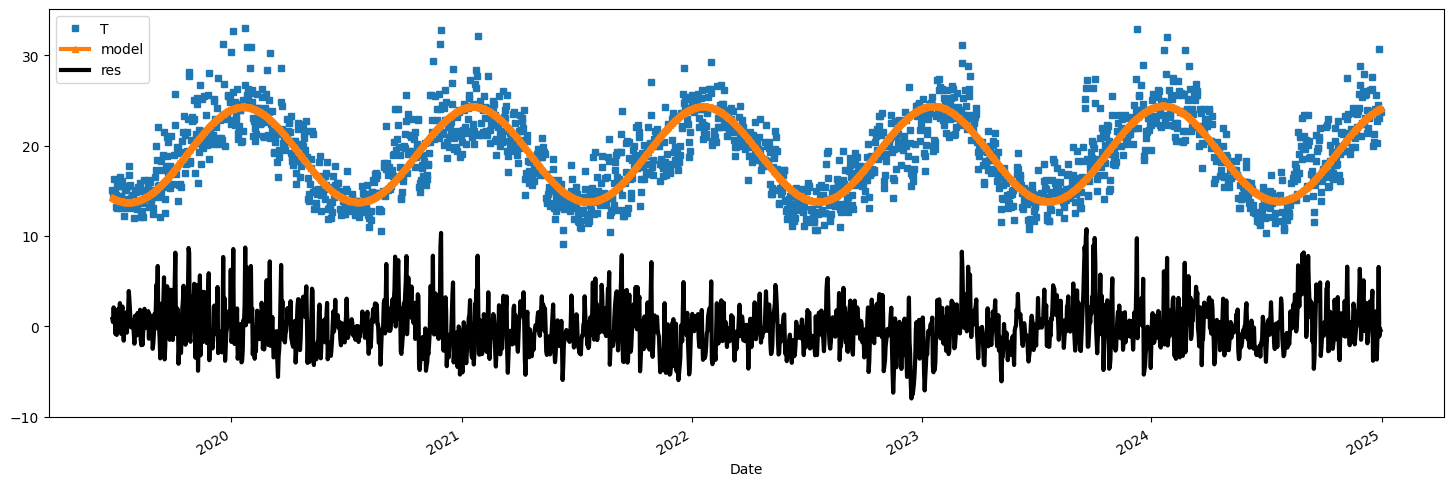

In [1]:
# Importation des bibliothèques nécessaires
import os
import numpy as np
import pandas as pd
import datetime as dt
from scipy.stats import norm
from scipy.optimize import curve_fit
from scipy import stats, interpolate
import matplotlib.pyplot as plt
from statsmodels.tsa.ar_model import AutoReg
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Définition des URLs pour récupérer les données historiques des températures maximales et minimales
max_file_url = 'https://raw.githubusercontent.com/BenjaminLarger/BenjaminLarger/main/IDCJAC0010_066037_1800_Data.csv'
min_file_url = 'https://raw.githubusercontent.com/BenjaminLarger/BenjaminLarger/main/IDCJAC0011_066037_1800_Data.csv'

# Chargement des données dans des DataFrames pandas
max_temp = pd.read_csv(max_file_url)
min_temp = pd.read_csv(min_file_url)

# Fonction pour convertir une ligne en objet datetime
def datetime(row):
    return dt.datetime(row.Year, row.Month, row.Day)

# Ajout d'une colonne 'Date' basée sur les colonnes Year, Month et Day
max_temp['Date'] = max_temp.apply(datetime, axis=1)
min_temp['Date'] = min_temp.apply(datetime, axis=1)

# Définir la colonne 'Date' comme index pour faciliter le traitement des données
max_temp.set_index('Date', inplace=True)
min_temp.set_index('Date', inplace=True)

# Suppression des colonnes inutiles
drop_cols = [0, 1, 2, 3, 4, 6, 7]
max_temp.drop(max_temp.columns[drop_cols], axis=1, inplace=True)
min_temp.drop(min_temp.columns[drop_cols], axis=1, inplace=True)

# Renommer les colonnes pour simplifier la manipulation
max_temp.rename(columns={'Maximum temperature (Degree C)': 'Tmax'}, inplace=True)
min_temp.rename(columns={'Minimum temperature (Degree C)': 'Tmin'}, inplace=True)

# Fusion des températures maximales et minimales dans un seul DataFrame
temps = max_temp.merge(min_temp, how='inner', left_on=['Date'], right_on=['Date'])

# Fonction pour calculer la température moyenne (T)
def avg_temp(row):
    return (row.Tmax + row.Tmin) / 2

# Ajout de la colonne 'T' pour les températures moyennes
temps['T'] = temps.apply(avg_temp, axis=1)

# Suppression des valeurs manquantes dans le DataFrame
temps = temps.dropna()

# Création d'une copie profonde de la colonne 'T' pour l'analyse
temp_t = temps['T'].copy(deep=True)
temp_t = temp_t.to_frame()

# Définition d'un modèle de température avec des paramètres spécifiques
def model(x, params):
    a, b, a1, b1 = params
    omega = 2 * np.pi / 365.25  # Fréquence annuelle
    theta = np.arctan(a1 / b1)  # Angle de phase
    alpha = np.sqrt(a1**2 + b1**2)  # Amplitude
    print('Parameters:\n     a {0:0.3}\n     b {1:0.3}\n alpha {2:0.3}\n theta {3:0.3}'.format(a, b, alpha, theta))
    y_pred = a + b * x + alpha * np.sin(omega * x + theta)
    return y_pred

# Fonction pour ajuster le modèle
def model_fit(x, a, b, a1, b1):
    omega = 2 * np.pi / 365.25  # Fréquence annuelle
    y_pred = a + b * x + a1 * np.cos(omega * x) + b1 * np.sin(omega * x)
    return y_pred

# Vérification si l'index est de type DatetimeIndex, sinon conversion
if isinstance(temp_t.index, pd.DatetimeIndex):
    first_ord = temp_t.index.map(dt.datetime.toordinal)[0]
    temp_t.index = temp_t.index.map(dt.datetime.toordinal)

# Ajustement des paramètres du modèle aux données historiques
params_all, cov = curve_fit(model_fit, xdata=temp_t.index - first_ord, ydata=temp_t['T'], method='lm')

# Calcul des prédictions et des résidus
temp_t['model'] = model(temp_t.index - first_ord, params_all)
temp_t['res'] = temp_t['T'] - temp_t['model']

# Conversion de l'index en format DatetimeIndex pour l'affichage
if not isinstance(temp_t.index, pd.DatetimeIndex):
    temp_t.index = temp_t.index.map(dt.datetime.fromordinal)

# Visualisation des résultats sur les 2000 derniers points
temp_t[-2000:].plot(figsize=(18, 6), style=['s', '^-', 'k-'], markersize=4, linewidth=3)


## Mathématiques utilisées
De nombreux auteurs ont choisi de modéliser la dynamique des températures avec des processus continus qui suivent des processus d'Ornstein-Uhlenbeck (OU) de retour à la moyenne.  
La nature cyclique des séries temporelles des températures justifie l'utilisation d'un processus de retour à la moyenne pour modéliser leur dynamique.

<b>Références Académiques :</b>
1. [Modélisation stochastique de la température et tarification des dérivés climatiques : étude empirique avec des données marocaines, Mohammed MRAOUA & Driss BARI (2005)](https://www.ajol.info/index.php/afst/article/view/46865)
2. [Dérivés Climatiques : Tarification et Applications de Gestion des Risques, Jon Tindall (2006)](https://actuaries.asn.au/Library/fsf06_paper_tindall_weather%20derivatives.pdf)
3. [Dérivés Climatiques et Prix du Risque de Marché, Julius Esunge & James J. Njong (2020)](https://digitalcommons.lsu.edu/cgi/viewcontent.cgi?article=1026&context=josa)

## Pourquoi un processus classique de retour à la moyenne d'Ornstein-Uhlenbeck (OU) ?

$\large dT_t = \kappa(\bar{T_t} - T_t)dt + \sigma_t dW_t$

Pour capturer pleinement la dynamique de retour à la moyenne de la température, il est important d'avoir :

$\large \mathbb{E}[T_t] \approx \bar{T_t}$

## Utilisation de la formule d'Itô-Doeblin

Cependant, en utilisant le calcul stochastique d'Itô et en résolvant l'équation différentielle stochastique, on obtient ce qui suit en utilisant la formule d'Itô-Doeblin en notation différentielle :

Formule d'Itô-Doeblin (où x est un processus d'Itô) :  
$df(t,x) = f_t(t, x) dt + f_x(t,x) dx +\frac{1}{2} f_{xx}(t,x) dx dx$

Ici, la difficulté réside dans le choix de la fonction $f(x,t)$. En suivant une méthodologie similaire à celle utilisée pour résoudre le modèle de taux d'intérêt de Cox-Ingersoll-Ross (CIR), nous choisissons :

$\large f(t,x) = e^{\kappa t}x$, où $\large f_t(t,x) = \kappa e^{\kappa t}x, f_x(t,x) = e^{\kappa t}, f_{xx}(t,x) = 0$

## Résolution de notre EDS

Ensuite, nous appliquons la formule d'Itô-Doeblin à notre EDS où notre processus d'Itô est $T_t$ avec la dynamique $dT_t$ décrite par notre EDS de retour à la moyenne :

$\large d(e^{\kappa t} T_t) = \large df(t,T_t) = f_t(t, T_t) dt + f_x(t,T_t) dT_t +\frac{1}{2} f_{xx}(t,T_t) dT_t dT_t$

$\large d(e^{\kappa t} T_t) = \kappa e^{\kappa t} T_t dt + e^{\kappa t} dT_t +\frac{1}{2} (0) dT_t dT_t$ (ici, nous substituons les dynamiques $dT_t$)

$\large d(e^{\kappa t} T_t) = \kappa e^{\kappa t} T_t dt + e^{\kappa t} \kappa(\bar{T_t} - T_t)dt+ e^{\kappa t} \sigma_t dW_t$ (on élimine les termes $\kappa e^{\kappa t} T_t dt$ qui se compensent)

$\large d(e^{\kappa t} T_t) = \kappa e^{\kappa t} \bar{T_t} dt+ e^{\kappa t} \sigma_t dW_t$ (on intègre sur l'intervalle $u \in [s,t], t>s$)

$\large \int_s^t d(e^{\kappa t} T_t) = e^{\kappa t} T_t - e^{\kappa s} T_s= \int_s^t  \kappa  e^{\kappa u} \bar{T_u} du + \int_s^t e^{\kappa u} \sigma_t dW_u$

$\large e^{\kappa t} T_t = e^{\kappa s} T_s + \int_s^t  \kappa e^{\kappa u} \bar{T_u} du + \int_s^t e^{\kappa u} \sigma_t dW_u$ (changement de base pour l'intégrale de Riemann vers $\large d\bar{T}_t$)

$\large e^{\kappa t} T_t = e^{\kappa s} T_s + \int_s^t  e^{\kappa u} d\bar{T_u} + \int_s^t e^{\kappa u} \sigma_t dW_u$ (division par $\large e^{\kappa t}$ à gauche)

$\large T_t =  T_s e^{-\kappa (t-s)}  + \int_s^t  e^{-\kappa (t-u)} d\bar{T_u} + \int_s^t e^{-\kappa (t-s)} \sigma_t dW_u$

$\large T_t =  T_s e^{-\kappa (t-s)} + \bar{T_t}e^{-\kappa (t-t)} - \bar{T_s} e^{-\kappa (t-s)} + \int_s^t e^{-\kappa (t-s)} \sigma_t dW_u$ (on regroupe les termes)

$\large T_t =  \bar{T_t} + (T_s -  \bar{T_s}) e^{-\kappa (t-s)}  + \int_s^t e^{-\kappa (t-s)} \sigma_t dW_u$

## L'espérance n'est pas la température moyenne de long terme

Parce que l'espérance de l'intégrale d'Itô est 0, nous arrivons à :

$\large \mathbb{E}[T_t] = \bar{T_t} + (T_s -  \bar{T_s}) e^{-\kappa (t-s)}$ qui n'est pas égal à $\large \bar{T_t}$

Cela se produit parce que le processus moyen vers lequel l'équation revient, $\bar{T}$, <b>n'est pas constant</b>.


## Résolution de notre problème

Cela n'est pas une coïncidence, car en ajoutant les termes AR(1) pour les changements dans la moyenne ajustée saisonnièrement, $\large \frac{d\bar{T_t}}{dt}$, cela ajustera la dérive afin que la moyenne à long terme de l'équation différentielle stochastique (EDS) soit $\large \bar{T_t}$.

Ainsi, nous arrivons à l'EDS suivante :

$\large dT_t = \left[\frac{d\bar{T_t}}{dt} + \kappa(\bar{T_t} - T_t)\right]dt + \sigma_t dW_t$

Nous pourrions utiliser à nouveau la formule d'Ito-Doeblin, mais il s'avère que nous pouvons désormais résoudre cette EDS en utilisant la méthode traditionnelle du facteur intégrant. En multipliant chaque terme par $\large e^{\int_0^t \kappa du}$, nous obtenons une expression où le membre de gauche est simplement la différentielle d'un produit :

$\large e^{\int_0^t \kappa du} d\bar{T_u} - e^{\int_0^t \kappa du} \kappa(\bar{T_u} - T_u)du + e^{\int_0^t \kappa du}dT_u = e^{\int_0^t \kappa du} \sigma_t dW_u$

$\large d \left[e^{\int_0^t \kappa du} (\bar{T_u} - T_u) \right] = e^{\int_0^t \kappa du} \sigma_t dW_u$

En considérant le processus d'Ito $\large Z_t = e^{\int_0^t \kappa du} (\bar{T_u} - T_u)$, ses dynamiques deviennent celles décrites dans l'équation ci-dessus :

$\large dZ_t = d \left[e^{\int_0^t \kappa du} (\bar{T_u} - T_u) \right] = e^{\int_0^t \kappa du} \sigma_t dW_u$

$\large Z_t = Z_0 - \int_0^t e^{\int_0^t \kappa du} \sigma_t dW_u$

En substituant $\large Z_t = e^{\int_0^t \kappa du} (\bar{T_u} - T_u)$ dans l'équation ci-dessus avec $\large \bar{T_0} = T_0$ :

$\large e^{\int_0^t \kappa du} (\bar{T_t} - T_t) = e^{\int_0^t \kappa du}(\bar{T_0} - T_0) - \int_0^t e^{\int_0^t \kappa du} \sigma_t dW_u$

Enfin, en réarrangeant, nous obtenons :

$\Large T_t = \bar{T_t} + e^{-\int_0^t \kappa du} \int_0^t e^{\int_0^t \kappa du} \sigma_t dW_u$

Et en prenant l'espérance, nous obtenons :

$\large \mathbb{E}[T_t] = \bar{T_t}$


## Dynamiques OU Modifiées

Nous avons enfin bien décrit nos dynamiques et nous sommes convaincus que l'espérance de ce processus stochastique est égale à la moyenne à long terme (tout en évoluant constamment) de notre Température Moyenne Quotidienne (TMQ).

$\large dT_t = \left[\frac{d\bar{T_t}}{dt} + \kappa(\bar{T_t} - T_t)\right]dt + \sigma_t dW_t$

Où la moyenne évolutive de la TMQ $\large \bar{T_t}$ est donnée par :

$\large \bar{T_t} = 16.8 + (3.32e-05)t + 5.05 sin((\frac{2\pi}{365.25})t + 1.27)$

Où la date <b>01-Jan 1859</b> correspond au premier nombre ordinal 0.


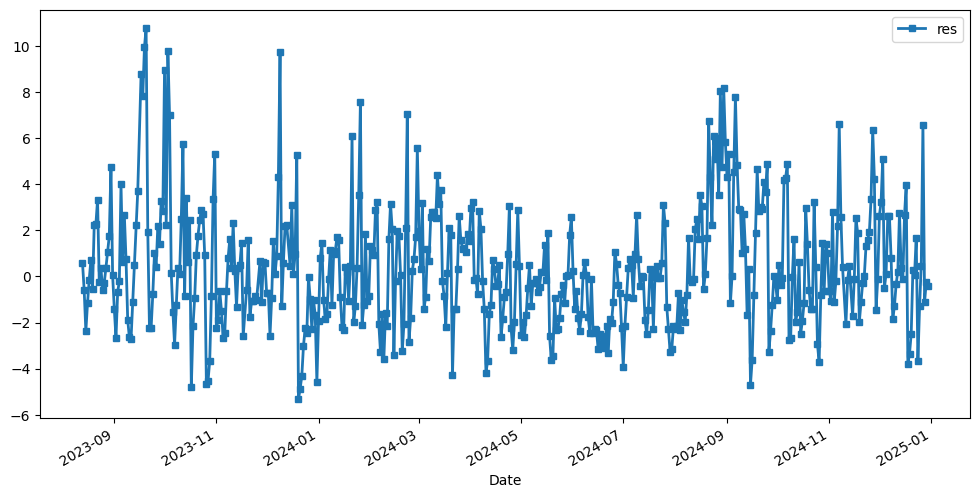

In [5]:
temp_t[['res']][-500:].plot(figsize=(12,6), style=['s-'] , markersize=4, linewidth=2 )
plt.show()

## Estimation de la Vitesse de Réversion à la Moyenne

$\large dT_t = \left[\frac{d\bar{T_t}}{dt} + \kappa(\bar{T_t} - T_t)\right]dt + \sigma_t dW_t$

Afin d'estimer notre paramètre de réversion à la moyenne, considérons la discrétisation d'Euler de notre EDS sur l'intervalle $\large t \in [i-1,i]$.

Discrétisation d'Euler de notre EDS sur l'intervalle $\large t \in [i-1,i]$ :

$\large T_i - T_{i-1} =  \bar{T}_{i} -\bar{T}_{i-1} + \kappa(\bar{T}_{i-1} - T_{i-1}) + \sigma_i z_i$

$\large T_i -\bar{T}_{i}= T_{i-1} + \bar{T}_{i-i} - \kappa(T_{i-1} - \bar{T}_{i-1}) + \sigma_i z_i$

Où $\large z_t \sim N(0,1)$. Créons maintenant un terme pour dé-trendre et supprimer la saisonnalité de notre série TMQ d'origine. Appelons cette transformation $\large \hat{T_t} = \large T_t - \bar{T_t}$. Nous obtenons alors :

$\large \hat{T_i} = \hat{T}_{i-1} - \kappa(\hat{T}_{i-1}) + \sigma_i z_i$

Cela peut être modélisé comme un processus AR(1) :

$\large \hat{T_i} = \gamma \hat{T}_{i-1} + e_i$

où $\large \kappa  = 1 - \gamma$, et $\large e_i = \sigma_i z_i$

Ceci est une approche linéaire pour estimer la vitesse de réversion à la moyenne.

## Ajustement d’un Modèle Autorégressif avec 1 Retard

Nous ajustons maintenant le modèle AR(1) à la série transformée $\large \hat{T_i}$ (dé-trendue et sans saisonnalité).


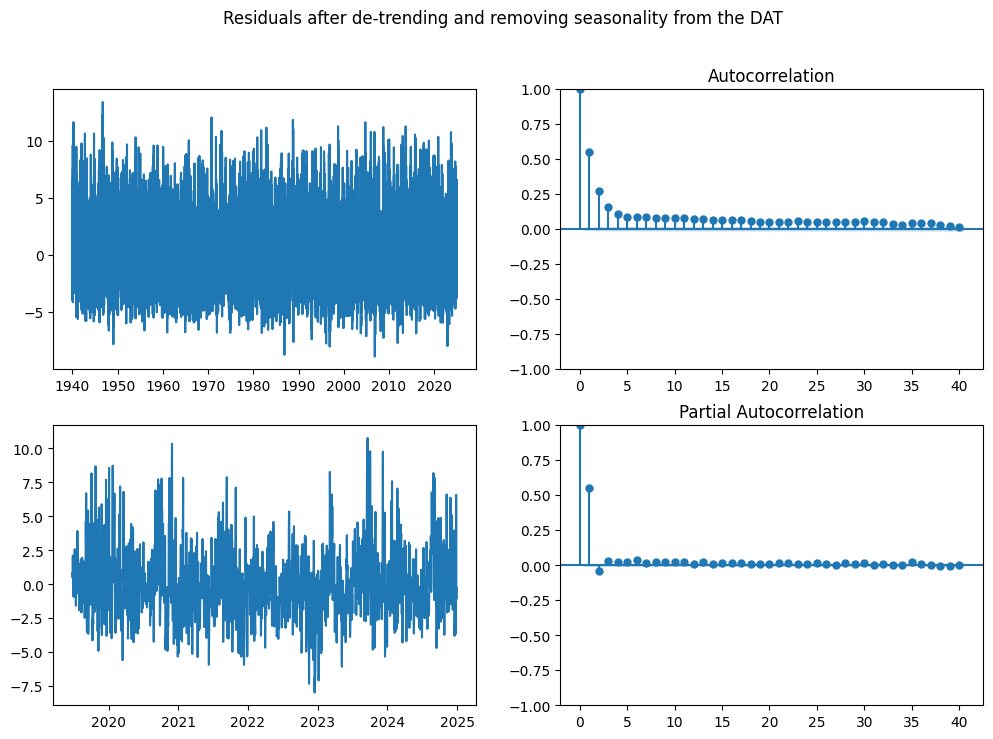

In [6]:
fig, axs = plt.subplots(2,2, figsize=(12,8))
fig.suptitle('Residuals after de-trending and removing seasonality from the DAT')
axs[0,0].plot(temp_t['res'])
axs[1,0].plot(temp_t['res'][-2000:])
plot_acf(temp_t['res'], lags=40, ax=axs[0,1])
plot_pacf(temp_t['res'], lags=40, ax=axs[1,1])
plt.show()

In [7]:
# Extraire les résidus de la colonne 'res' de temp_t
residuals = temp_t['res']
# Changer l'index des résidus pour qu'il soit de type période quotidienne
residuals.index = pd.DatetimeIndex(residuals.index).to_period('D')

# Créer et ajuster un modèle AutoReg avec un décalage de 1 (pour un lag de 1)
model = AutoReg(residuals, lags=1, old_names=True, trend='n')
model_fit  = model.fit()

# Extraire les coefficients du modèle ajusté
coef = model_fit.params
# Extraire les résidus du modèle ajusté
res = model_fit.resid

# Afficher le résumé du modèle ajusté
print(model_fit.summary())


                            AutoReg Model Results                             
Dep. Variable:                    res   No. Observations:                30952
Model:                     AutoReg(1)   Log Likelihood              -66615.210
Method:               Conditional MLE   S.D. of innovations              2.082
Date:                Wed, 01 Jan 2025   AIC                         133234.420
Time:                        12:45:29   BIC                         133251.100
Sample:                    01-02-1940   HQIC                        133239.764
                         - 12-30-2024                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
res.L1         0.5523      0.005    116.558      0.000       0.543       0.562
                                    Roots                                    
                  Real          Imaginary           M

<ipython-input-7-2a4ed88db157>:7: FutureWarning: old_names will be removed after the 0.14 release. You should stop setting this parameter and use the new names.
  model = AutoReg(residuals, lags=1, old_names=True, trend='n')


In [ ]:
gamma = coef[0]
kappa = 1 - gamma

print("Kappa is estimated as: {:0.3}".format(kappa))

Kappa is estimated as: 0.448


<ipython-input-171-f1b81b164641>:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  gamma = coef[0]


Le modèle AutoReg(1) montre que les résidus à t-1 ont une relation positive modérée avec ceux à t (coefficient de 0.5523).
Le coefficient est statistiquement significatif (p < 0.05) et le modèle est bien ajusté.

## Dynamique de l'OU modifiée avec des constantes

Nous avons enfin une description correcte de notre dynamique et nous sommes convaincus que l'espérance de ce processus stochastique est égale à la moyenne à long terme (tout en changeant constamment) de notre Température Moyenne Quotidienne (TMQ).

$\large dT_t = \left[\frac{d\bar{T_t}}{dt} + 0.438 (\bar{T_t} - T_t)\right]dt + \sigma_t dW_t$

Où notre moyenne changeante de la TMQ $\large \bar{T_t}$ est :

$\large \bar{T_t} = 16.8 + (3.32e-05)t + 5.05 \sin\left(\frac{2\pi}{365.25}t + 1.27\right)$

La première dérivée n'a pas besoin d'une approximation par différences finies ici, car la fonction est différentiable $\large \bar{T'_t}$

$\large \bar{T'_t} = (3.32e-05) + 5.05 \left(\frac{2\pi}{365.25}\right) \cos\left(\frac{2\pi}{365.25}t + 1.27\right)$

Où la date <b>01-Jan 1840</b> correspond au premier numéro ordinal 0.


# Modèles de Volatilité de la Température

Maintenant que nous avons défini les paramètres de notre processus Ornstein-Uhlenbeck modifié à retour à la moyenne qui décrit la dynamique de notre température, nous allons maintenant nous intéresser à la mise en œuvre de différents modèles pour nos patterns de volatilité variable dans le temps.

Nous avons plusieurs options pour modéliser la volatilité de la température à travers les saisons, et j'ai découvert que le modèle le plus efficace pour modéliser la volatilité de la température était la Régression Locale et Nonparamétrique - Splines.

## Régression Locale et Nonparamétrique - Splines

L'interpolation est une méthode permettant d'estimer des points de données inconnus dans une plage donnée. L'interpolation par splines est une méthode d'interpolation polynomiale par morceaux. L'interpolation par splines est une méthode utile pour lisser les courbes ou les données de surfaces.

#### Ajustement de la courbe B-spline
La B-spline ou spline de base est une méthode d'approximation de courbe, et nécessite des paramètres tels que les nœuds, les coefficients de spline et le degré d'une spline. Pour construire un ajustement de spline plus lisse, nous devons spécifier le nombre de nœuds pour les données cibles.
Les nœuds sont les points de jointure des segments polynomiaux.

###### Étapes
1. En fonction du nombre de nœuds, nous déterminerons le nouveau vecteur de données x en utilisant la fonction <i>quantile</i>.
2. La fonction <i>splrep</i> renvoie un tuple contenant le vecteur de :
 - nœuds
 - coefficients de B-spline
 - degré de la spline
3. Utiliser la classe <i>BSpline</i> pour construire l'ajustement de la spline sur les données du vecteur x.


In [11]:
# Création d'une copie profonde de la colonne 'T' de 'temps'
temp_vol = temps['T'].copy(deep=True)
# Conversion en DataFrame
temp_vol = temp_vol.to_frame()
# Ajout de la colonne 'day' pour le jour de l'année
temp_vol['day'] = temp_vol.index.dayofyear
# Ajout de la colonne 'month' pour le mois
temp_vol['month'] = temp_vol.index.month

# Calcul de la moyenne et de l'écart-type de la température pour chaque jour de l'année
vol = temp_vol.groupby(['day'])['T'].agg(['mean','std'])
# Création de tableaux numpy pour les jours et l'écart-type
days = np.array(vol['std'].index)
T_std = np.array(vol['std'].values)

# Fonction pour effectuer une interpolation spline
def spline(knots, x, y):
    # Création d'un vecteur x_new avec une interpolation linéaire
    x_new = np.linspace(0, 1, knots+2)[1:-1]
    # Calcul de la spline en utilisant les nœuds obtenus par quantile
    t, c, k = interpolate.splrep(x, y, t=np.quantile(x, x_new), s=3)
    # Calcul des valeurs ajustées de la spline
    yfit = interpolate.BSpline(t, c, k)(x)
    return yfit


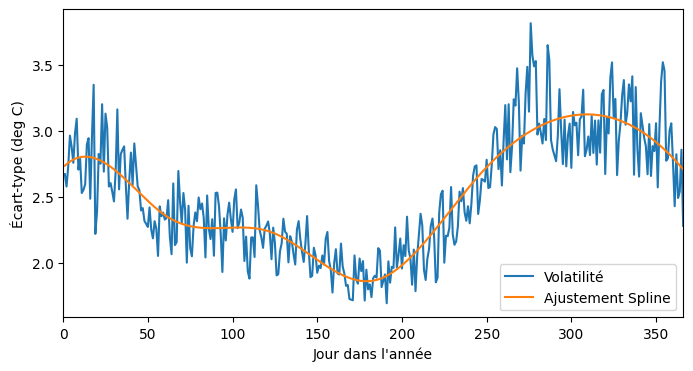

In [10]:
from scipy import interpolate

# Conversion des index et des valeurs en tableaux numpy
x = np.array(vol['std'].index)
y = np.array(vol['std'].values)

# Définition du nombre de nœuds pour les splines
knot_numbers = 5
# Création d'un vecteur x_new avec une interpolation linéaire
x_new = np.linspace(0, 1, knot_numbers+2)[1:-1]
# Calcul des nœuds à partir du quantile de x
q_knots = np.quantile(x, x_new)
# Appliquer l'interpolation spline avec les nœuds calculés
t, c, k = interpolate.splrep(x, y, t=q_knots, s=1)
# Calcul des valeurs de la spline ajustée
yfit = interpolate.BSpline(t, c, k)(x)

# Affichage des résultats
plt.figure(figsize=(8,4))
# Tracer la volatilité réelle
plt.plot(x, y, label='Volatilité')
# Tracer la courbe spline ajustée
plt.plot(x, yfit, label='Ajustement Spline')
plt.ylabel('Écart-type (deg C)')
plt.xlabel('Jour dans l\'année')
plt.xlim(0, 366)  # Limiter l'axe des x à l'intervalle de l'année
plt.legend(loc='lower right')
plt.show()


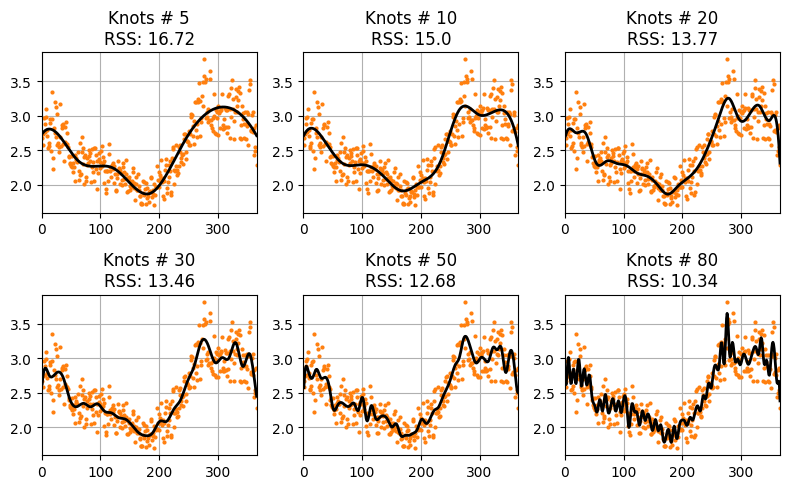

In [12]:
knots = [5, 10, 20, 30, 50, 80]
i = 0

fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(8, 5))

for row in range(2):
    for col in range(3):
        ax[row][col].plot(x, y, '.',c='tab:orange', markersize=4)
        yfit = spline(knots[i], x, y)
        rss = np.sum( np.square(y-yfit) )
        ax[row][col].plot(x, yfit, 'k', linewidth=2)
        ax[row][col].set_title("Knots # "+str(knots[i])+"\nRSS: "+str(round(rss,2)), color='k')
        ax[row][col].set_xlim(0,366)
        ax[row][col].grid()
        i=i+1

plt.tight_layout()
plt.show()

Dans ce cas, le modèle 5 knots est le meilleur fit, ayant le RSS le plus élevé.

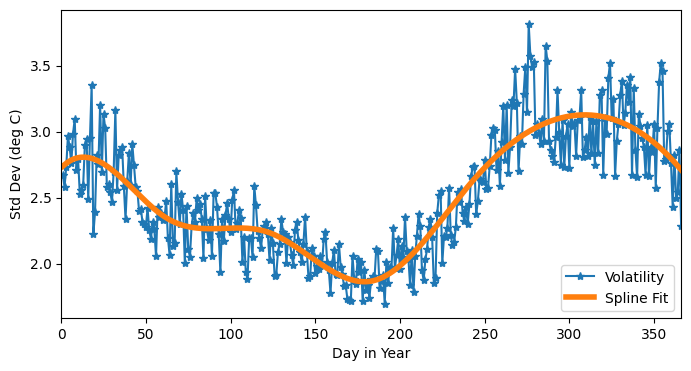

In [9]:
volatility = spline(5, days, T_std)
plt.figure(figsize=(8,4))
plt.plot(days, T_std, marker='*',label='Volatility')
plt.plot(days, volatility, linewidth=4, label='Spline Fit')
plt.ylabel('Std Dev (deg C)')
plt.xlabel('Day in Year')
plt.xlim(0,366)
plt.legend(loc='lower right')
plt.show()

### Volatilité du Processus Température

L'estimateur de volatilité est basé sur la variation quadratique $\Large \sigma_t^2$ du processus de température $\Large T_t$

$\Large \hat{\sigma}^2_t = \frac{1}{N_t} \sum^{N-1}_{i=0} (T_{i+1} - T_i)^2 $

$\Large \sigma_t$ est la volatilité dynamique du processus Température. Cela pourrait être à la fois quotidien (comme avec nos dynamiques de température) ou saisonnier (par exemple mensuel).


In [13]:
def T_model(x, a, b, alpha, theta):
    omega = 2*np.pi/365.25
    T = a + b*x + alpha*np.sin(omega*x + theta)
    return T

def dT_model(x, a, b, alpha, theta):
    omega=2*np.pi/365.25
    dT =  b + alpha*omega*np.cos(omega*x + theta)
    return dT

def spline(knots, x, y):
    x_new = np.linspace(0, 1, knots+2)[1:-1]
    t, c, k = interpolate.splrep(x, y, t=np.quantile(x, x_new), s=3)
    yfit = interpolate.BSpline(t,c, k)(x)
    return yfit

Tbar_params = [16.8, 3.32e-05, 5.05, 1.27]

## Simulation des chemeins - Euler step - Monte Carlo
Maintenant avec notre shéma d'approximation d'Euler

$\large T_{i+1} = T_{i} + \bar{T'}_{i} + \kappa(\bar{T}_{i} - T_{i}) + \sigma_i z_i$

In [15]:
def euler_step(row, kappa, M):
    """Fonction pour l'étape d'approximation du schéma d'Euler dans
    la dynamique modifiée d'OH pour les simulations de température.
    Entrées :
    - ligne du dataframe avec les colonnes : T, Tbar, dTbar et vol
    - kappa : taux de réversion vers la moyenne
    Sortie :
    - temp : températures simulées pour le jour suivant
    """
    if row['Tbar_shift'] != np.nan:
        T_i = row['Tbar']
    else:
        T_i = row['Tbar_shift']
    T_det = T_i + row['dTbar']  # Température déterministe
    T_mrev =  kappa*(row['Tbar'] - T_i)  # Réversion vers la moyenne
    sigma = row['vol']*np.random.randn(M)  # Volatilité simulée
    return T_det + T_mrev + sigma  # Température simulée finale

def monte_carlo_temp(trading_dates, Tbar_params, vol_model, first_ord, M=1, kappa=0.438):
    """Simulation Monte Carlo de la température
    Entrées :
    - trading_dates : pandas DatetimeIndex des dates de début à fin
    - M : nombre de simulations
    - Tbar_params : paramètres utilisés pour le modèle Tbar
    - vol_model : modèle de volatilité ajusté avec index de jours dans l'année
    - first_ord : premier ordinal du modèle Tbar ajusté
    Sorties :
    - mc_temps : DataFrame de tous les composants individuels
    - mc_sims : DataFrame de tous les chemins de température simulés
    """
    if isinstance(trading_dates, pd.DatetimeIndex):
        trading_date = trading_dates.map(dt.datetime.toordinal)  # Conversion des dates en ordinals

    # Utilisation du processus d'Ornstein-Uhlenbeck modifié avec les paramètres estimés pour simuler Tbar
    Tbars = T_model(trading_date - first_ord, *Tbar_params)

    # Utilisation de la dérivée du processus OH modifié pour calculer le changement de Tbar
    dTbars = dT_model(trading_date - first_ord, *Tbar_params)

    # Création d'un DataFrame avec les Tbars et dTbars
    mc_temps = pd.DataFrame(data=np.array([Tbars, dTbars]).T,
                            index=trading_dates, columns=['Tbar','dTbar'])

    # Ajout de la colonne pour le jour de l'année
    mc_temps['day'] = mc_temps.index.dayofyear

    # Application du modèle de volatilité BSpline en fonction du jour de l'année
    mc_temps['vol'] = vol_model[mc_temps['day']-1]

    # Décalage de Tbar d'un jour (série Tbar retardée)
    mc_temps['Tbar_shift'] = mc_temps['Tbar'].shift(1)

    # Application de la fonction Euler Step sur le DataFrame
    data = mc_temps.apply(euler_step, args=[kappa, M], axis=1)

    # Création du DataFrame final avec toutes les simulations
    mc_sims = pd.DataFrame(data=[x for x in [y for y in data.values]],
                 index=trading_dates, columns=range(1, M+1))

    return mc_temps, mc_sims


###Simulation des températures
Nous avons finalement simulé les températures
Here we finally simulate temperature under the Physical.

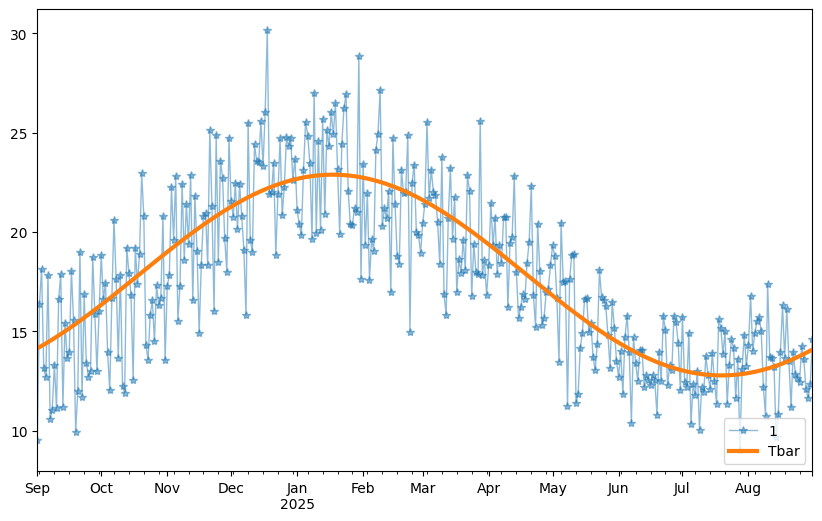

In [17]:
# Définir la plage de dates de trading
trading_dates = pd.date_range(start='2024-09-01', end='2025-08-31', freq='D')

# Calcul de la volatilité avec le modèle spline
volatility = spline(5, days, T_std)

# Simulation Monte Carlo des températures
mc_temps, mc_sims = monte_carlo_temp(trading_dates, Tbar_params, volatility, first_ord)

# Affichage des résultats
plt.figure(figsize=(10, 6))

# Traçage des températures simulées (1ère simulation) avec transparence et étoiles comme marqueurs
mc_sims[1].plot(alpha=0.5, linewidth=1, marker='*')

# Traçage de la température moyenne (Tbar) avec une ligne épaisse
mc_temps["Tbar"].plot(linewidth=3)

# Ajout de la légende en bas à droite
plt.legend(loc='lower right')

# Affichage du graphique
plt.show()


### Distributions de Température
Observons la différence entre la distribution des simulations de température Monte Carlo entre les pics des journées d'été et d'hiver.

Ici, nous simulons 10 000 températures le 1er juillet 2023 pour l'hiver et le 1er janvier 2023 pour une représentation des températures et de la volatilité maximales de l'été.


In [18]:
# Définir le nombre de simulations Monte Carlo
no_sims = 10000

# Définir la plage de dates pour l'hiver (1er juillet 2025)
trading_dates_winter = pd.date_range(start='2025-07-01', end='2025-07-01', freq='D')

# Simulation Monte Carlo des températures pour l'hiver
mc_temps_winter, mc_sims_winter = monte_carlo_temp(trading_dates_winter, Tbar_params, volatility, first_ord, no_sims)

# Définir la plage de dates pour l'été (1er janvier 2025)
trading_dates_summer = pd.date_range(start='2025-01-01', end='2025-01-01', freq='D')

# Simulation Monte Carlo des températures pour l'été
mc_temps_summer, mc_sims_summer = monte_carlo_temp(trading_dates_summer, Tbar_params, volatility, first_ord, no_sims)


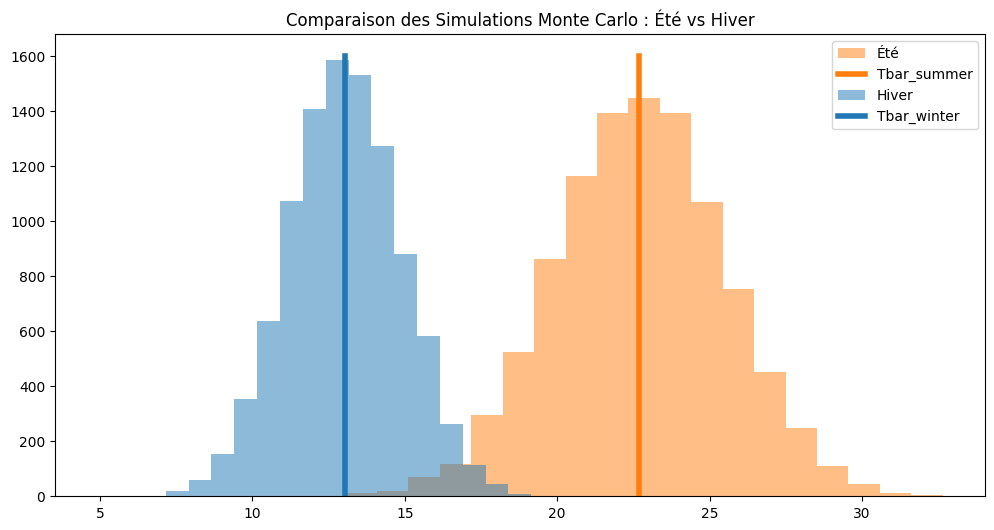

In [19]:
# Créer une figure pour afficher les résultats
plt.figure(figsize=(12,6))

# Ajouter un titre pour le graphique
plt.title('Simulations Monte Carlo de Température : Hiver vs Été')

# Extraire les températures moyennes pour l'été et l'hiver
Tbar_summer = mc_temps_summer.iloc[-1,:]['Tbar']
Tbar_winter = mc_temps_winter.iloc[-1,:]['Tbar']

# Afficher l'histogramme des simulations pour l'été
plt.hist(mc_sims_summer.iloc[-1,:], bins=20, alpha=0.5, label='Été', color='tab:orange')
# Ajouter une ligne pour la température moyenne de l'été
plt.plot([Tbar_summer,Tbar_summer],[0,1600], linewidth=4, label='Tbar_summer', color='tab:orange')

# Ajouter un titre pour le graphique
plt.title('Comparaison des Simulations Monte Carlo : Été vs Hiver')

# Afficher l'histogramme des simulations pour l'hiver
plt.hist(mc_sims_winter.iloc[-1,:], bins=20, alpha=0.5, label='Hiver', color='tab:blue')
# Ajouter une ligne pour la température moyenne de l'hiver
plt.plot([Tbar_winter,Tbar_winter],[0,1600], linewidth=4, label='Tbar_winter', color='tab:blue')

# Ajouter une légende pour distinguer les graphiques
plt.legend()

# Afficher le graphique
plt.show()


## Méthodologie de Tarification Neutre au Risque

Le marché des dérivés climatiques est un exemple typique de marché incomplet,
car la variable sous-jacente, la température, n'est pas négociable. Par conséquent,
nous devons prendre en compte le prix du risque du marché $\large \lambda$, afin d'obtenir des prix uniques pour ces contrats.

Puisqu'il n'existe pas encore de marché réel à partir duquel nous pouvons
obtenir des prix, nous supposons par simplicité que le prix du risque du marché est constant.
De plus, nous supposons que nous disposons d'un actif sans risque avec un taux d'intérêt constant $\large r$ et d'un contrat qui, pour chaque degré Celsius, paye une unité de devise.
Ainsi, sous une mesure de martingale $\large \mathbb{Q}$, caractérisée par le prix du risque du marché
$\large \lambda$, notre processus de prix, également noté $\large T_t$, satisfait aux dynamiques suivantes :

$\large dT_t^\mathbb{Q} = \left[\frac{d\bar{T_t}}{dt} + \kappa (\bar{T_t} - T_t) - \lambda \sigma_t \right]dt + \sigma_t dW_t^\mathbb{Q}$

Comparé aux dynamiques suivantes sous la mesure de probabilité physique $\large \mathbb{P}$ :

$\large dT_t^\mathbb{P} = \left[\frac{d\bar{T_t}}{dt} + \kappa (\bar{T_t} - T_t)\right]dt + \sigma_t dW_t^\mathbb{P}$


$\large T_t =  \bar{T_t} + (T_s -  \bar{T_s}) e^{-\kappa (t-s)}  + \int_s^t e^{-\kappa (t-u)} \sigma_u dW_u$

$\large \mathbb{E}^\mathbb{P}[T_t | F_s] = \bar{T_t} + (T_s -  \bar{T_s}) e^{-\kappa (t-s)}$

$\large \mathbb{Var}^\mathbb{P}[T_t | F_s] = \int_s^t e^{-2 \kappa (t-u)} \sigma^2_u du$

### Sous la mesure martingale $\large \mathbb{Q}$, l'équation devient maintenant :

$\large T_t =  \bar{T_t} + (T_s -  \bar{T_s}) e^{-\kappa (t-s)} - \lambda \int_s^t e^{-\kappa (t-u)} \sigma_u du + \int_s^t e^{-\kappa (t-u)} \sigma_u dW_u$

$\large \mathbb{E}^\mathbb{Q}[T_t | F_s] = \mathbb{E}^\mathbb{P}[T_t | F_s] - \lambda \int_s^t e^{-\kappa (t-u)} \sigma_u du$

$\large \mathbb{Var}^\mathbb{Q}[T_t | F_s] = \int_s^t e^{-2 \kappa (t-u)} \sigma^2_u du$

### Évaluation de ces intégrales sur un seul intervalle
Tant que la volatilité reste constante tout au long de l'intervalle, les équations suivantes pour la moyenne, la variance et la covariance sous la mesure neutre au risque sont valables.

Volatilité constante sur l'intervalle : $\large \sigma_n, n \in [s,t]$

$\large \mathbb{E}^\mathbb{Q}[T_t | F_s] = \mathbb{E}^\mathbb{P}[T_t | F_s] - \frac{\lambda \sigma_n}{\kappa} (1-e^{-\kappa (t-s)})$

$\large \mathbb{Var}^\mathbb{Q}[T_t | F_s] = \frac{\sigma^2_n}{2 \kappa} (1 - e^{-2 \kappa (t-s)})$

Où : $\large 0 \leq s \leq t \leq u$

$\large \mathbb{Cov}^\mathbb{Q}[T_t T_u| F_s] = e^{-\kappa(u-t)} \mathbb{Var}^\mathbb{Q}[T_t | F_s]$

## Méthodologie de Tarification Neutre au Risque

Le marché des dérivés climatiques est un exemple typique de marché incomplet,
car la variable sous-jacente, la température, n'est pas négociable. Par conséquent,
nous devons prendre en compte le prix du risque du marché $\large \lambda$, afin d'obtenir des prix uniques pour ces contrats.

Puisqu'il n'existe pas encore de marché réel à partir duquel nous pouvons
obtenir des prix, nous supposons par simplicité que le prix du risque du marché est constant.
De plus, nous supposons que nous disposons d'un actif sans risque avec un taux d'intérêt constant $\large r$ et d'un contrat qui, pour chaque degré Celsius, paye une unité de devise.
Ainsi, sous une mesure de martingale $\large \mathbb{Q}$, caractérisée par le prix du risque du marché
$\large \lambda$, notre processus de prix, également noté $\large T_t$, satisfait aux dynamiques suivantes :

$\large dT_t^\mathbb{Q} = \left[\frac{d\bar{T_t}}{dt} + \kappa (\bar{T_t} - T_t) - \lambda \sigma_t \right]dt + \sigma_t dW_t^\mathbb{Q}$

Comparé aux dynamiques suivantes sous la mesure de probabilité physique $\large \mathbb{P}$ :

$\large dT_t^\mathbb{P} = \left[\frac{d\bar{T_t}}{dt} + \kappa (\bar{T_t} - T_t)\right]dt + \sigma_t dW_t^\mathbb{P}$


### Méthode 1: Approche Black Scholes

#### Risk-Neutral $\mu$
$\large \mu_t = \mathbb{E}^\mathbb{Q}[H_n | F_s] \approx 17N - \sum^N_n \mathbb{E}^\mathbb{Q}[T_n | F_s]$

$\large \mathbb{E}^\mathbb{Q}[T_t | F_s] = \mathbb{E}^\mathbb{P}[T_t | F_s] - \frac{\lambda \sigma_n}{\kappa} (1-e^{-\kappa (t-s)})$

In [20]:
def rn_mean(time_arr, vol_arr, Tbars, lamda, kappa):
    """Évalue l'intégrale neutre au risque ci-dessus pour chaque segment de volatilité constante
    Intégration rectangulaire avec un pas de taille des jours
    """
    dt = 1/365.25  # Calcul du pas de temps en années (1 jour = 1/365.25)
    N = len(time_arr)  # Nombre de points dans le tableau de temps
    mean_intervals = -vol_arr*(1 - np.exp(-kappa*dt))/kappa  # Calcul des intervalles moyens basés sur la volatilité
    return 17*N - (np.sum(Tbars) - lamda*np.sum(mean_intervals))  # Calcul de la moyenne en utilisant l'intégrale neutre au risque

#### Risque-neutre $\sigma^2_t$
$\large \sigma^2_t = \sum^N_n Var(T_n) + 2 \sum^N_{n=1} \sum^N_{n<m} Cov(T_n,T_m)$

$\large \mathbb{Var}^\mathbb{Q}[T_t | F_s] = \frac{\sigma^2_n}{2 \kappa} (1 - e^{-2 \kappa (t-s)})$

Où: $\large 0 \leq s \leq t \leq u$

$\large \mathbb{Cov}^\mathbb{Q}[T_t T_u| F_s] = e^{-\kappa(u-t)} \mathbb{Var}^\mathbb{Q}[T_t | F_s]$

In [21]:
def rn_var(time_arr, vol_arr, kappa):
    """Évalue l'intégrale neutre au risque ci-dessus pour chaque segment de volatilité constante
    Intégration rectangulaire avec un pas de taille des jours
    """
    dt = 1/365.25  # Calcul du pas de temps en années (1 jour = 1/365.25)
    var_arr = np.power(vol_arr, 2)  # Calcul de la variance de la volatilité (élévation au carré)
    var_intervals = var_arr / (2 * kappa) * (1 - np.exp(-2 * kappa * dt))  # Calcul des intervalles de variance
    cov_sum = 0  # Initialisation de la somme des covariances

    # Calcul de la covariance entre les segments de volatilité
    for i, ti in enumerate(time_arr):
        for j, tj in enumerate(time_arr):
            if j > i:  # On ne considère que j > i pour éviter de calculer deux fois la même covariance
                cov_sum += np.exp(-kappa * (tj - ti)) * var_intervals[i]

    return np.sum(var_intervals) + 2 * cov_sum  # Retourne la somme des variances et des covariances


In [22]:
def risk_neutral(trading_dates, Tbar_params, vol_model, first_ord, lamda, kappa=0.438):
    """Calcule la moyenne et la variance sous la mesure neutre au risque pour les températures simulées"""

    # Si les dates de trading sont sous forme d'index datetime, on les convertit en ordinale
    if isinstance(trading_dates, pd.DatetimeIndex):
        trading_date = trading_dates.map(dt.datetime.toordinal)

    # Utilise le modèle Tbar pour obtenir les températures de référence
    Tbars = T_model(trading_date - first_ord, *Tbar_params)

    # Utilise le modèle dérivé dTbar pour obtenir les changements dans les températures de référence
    dTbars = dT_model(trading_date - first_ord, *Tbar_params)

    # Crée un DataFrame avec les températures et leurs dérivées
    mc_temps = pd.DataFrame(data=np.array([Tbars, dTbars]).T,
                            index=trading_dates, columns=['Tbar', 'dTbar'])

    # Ajoute une colonne pour le jour de l'année
    mc_temps['day'] = mc_temps.index.dayofyear

    # Ajoute la volatilité correspondant à chaque jour de l'année
    mc_temps['vol'] = vol_model[mc_temps['day'] - 1]

    # Crée un tableau représentant le temps en années
    time_arr = np.array([i / 365.25 for i in range(1, len(trading_dates) + 1)])

    # Récupère les valeurs de volatilité à partir du DataFrame
    vol_arr = mc_temps['vol'].values

    # Calcule la moyenne sous la mesure neutre au risque
    mu_rn = rn_mean(time_arr, vol_arr, Tbars, lamda, kappa)

    # Calcule la variance sous la mesure neutre au risque
    var_rn = rn_var(time_arr, vol_arr, kappa)

    return mu_rn, var_rn  # Retourne la moyenne et la variance


En utilisant le théorème fondamental de la tarification des actifs, nous obtenons la formulation suivante pour la tarification neutre au risque.

$\begin{equation}\large
\frac{C_t}{B_t} = \mathbb{E}_{\mathbb{Q}}[\frac{C_T}{B_T}\mid F_t]
\end{equation}$

$\begin{equation}\large
C_t = B_t \mathbb{E}_{\mathbb{Q}}[\frac{C_T}{B_T}\mid F_t]
\end{equation}$

<b>Option d'achat (Call Option) :</b> $\large \xi = \alpha(DD - K)^+$

$\large C_t = B_t \mathbb{E}_{\mathbb{Q}}[\alpha(DD - K)^+]$

$\large C_t = \alpha e^{-r(T-t)} \int^\infty_K (x-K)f_{DD}(x)dx$

$\large C_t = \alpha e^{-r(T-t)} \left( (\mu_t - K) \Phi(-Z_t) + \frac{\sigma_t}{\sqrt{2\pi}} e^{-\frac{Z_t^2}{2}}\right)$

où : $\large Z_t = \frac{K - \mu_t}{\sigma_t}$ et $\large \Phi$ est la fonction de répartition de la distribution normale.

<b>Option de vente (Put Option) :</b> $\large \xi = \alpha(K - DD)^+$

$\large P_t = B_t \mathbb{E}_{\mathbb{Q}}[\alpha(K - DD)^+]$

$\large P_t = \alpha e^{-r(T-t)} \int^K_0 (K-x)f_{DD}(x)dx$

$\large P_t = \alpha e^{-r(T-t)} \left( (K - \mu_t) \left(\Phi(Z_t) - \Phi(-\frac{\mu_t}{\sigma_t})\right)+ \frac{\sigma_t}{\sqrt{2\pi}} \left( e^{-\frac{Z_t^2}{2}} - e^{-\frac{u_t^2}{2 \sigma^2_t}} \right) \right)$



In [23]:
def winter_option(trading_dates, r, alpha, K, tau, opt='c', lamda=0.0):
    """Évalue la valeur juste de l'option sur la température en hiver
    Basée sur les degrés-jours de chauffage uniquement si la probabilité physique
    que la température moyenne dépasse Tref (17°C) est proche de 0
    """
    # Calcul des paramètres neutres au risque
    mu_rn, var_rn = risk_neutral(trading_dates, Tbar_params, volatility, first_ord, lamda)

    # Calcul du facteur d'actualisation
    disc = np.exp(-r*tau)

    # Calcul de la volatilité sous la mesure neutre au risque
    vol_rn = np.sqrt(var_rn)

    # Calcul de Zt, utilisé dans la formule de Black-Scholes
    zt = (K - mu_rn)/vol_rn
    exp = np.exp(-zt**2/2)

    # Si option de type call (c), appliquer la formule correspondante
    if opt == 'c':
        return alpha*disc*((mu_rn - K)*stats.norm.cdf(-zt) + vol_rn*exp/np.sqrt(2*np.pi))

    # Si option de type put, appliquer la formule correspondante
    else:
        # Calcul supplémentaire pour le put
        exp2 = np.exp(-mu_rn**2/(2*vol_rn**2))
        return alpha*disc*((K - mu_rn)*(stats.norm.cdf(zt) - stats.norm.cdf(-mu_rn/vol_rn)) +
                           vol_rn/np.sqrt(2*np.pi)*(exp-exp2))


In [24]:
# Définir l'intervalle des dates de trading entre le 1er juin 2025 et le 31 août 2025
trading_dates = pd.date_range(start='2025-06-01', end='2025-08-31', freq='D')

# Définir les paramètres de l'option
r = 0.05  # Taux d'intérêt sans risque
K = 300   # Prix d'exercice de l'option
alpha = 2500  # Coefficient multiplicateur de l'option

# Fonction pour calculer le nombre d'années entre deux dates
def years_between(d1, d2):
    # Convertir les dates au format datetime
    d1 = dt.datetime.strptime(d1, "%Y-%m-%d")
    d2 = dt.datetime.strptime(d2, "%Y-%m-%d")
    # Retourner la différence en années
    return abs((d2 - d1).days) / 365.25

# Définir la date de début et la date de fin du contrat
start = dt.datetime.today().strftime('%Y-%m-%d')  # Date actuelle
end = '2025-08-31'  # Date de fin du contrat

# Calculer le temps restant avant la fin du contrat (tau)
tau = years_between(start, end)

# Afficher les résultats
print('Date de début de l’évaluation:', start,
      '\nDate de fin du contrat:', end,
      '\nAnnées entre les dates :', round(tau, 3))


Date de début de l’évaluation: 2025-01-01 
Date de fin du contrat: 2025-08-31 
Années entre les dates : 0.663


In [25]:
print('Prix du Call: ', round(winter_option(trading_dates, r, alpha, K, tau, 'c'),2))
print('Prix du Put: ', round(winter_option(trading_dates, r, alpha, K, tau, 'p'),2))

Prix du Call:  96930.94
Prix du Put:  0.04


### Méthode 2 : Évaluation par Monte Carlo

$\begin{equation}\large
\frac{C_t}{B_t} = \mathbb{E}_{\mathbb{Q}}[\frac{C_T}{B_T}\mid F_t]
\end{equation}$

$\begin{equation}\large
C_t = B_t \mathbb{E}_{\mathbb{Q}}[\frac{C_T}{B_T}\mid F_t]
\end{equation}$

<b>Option d'achat :</b> $\large \xi = \alpha(DD - K)^+$

$\large C_t = e^{-r\tau} \mathbb{E}_{\mathbb{Q}}[\alpha(DD - K)^+ \mid F_t]$

Pour chaque simulation $\Large m \in M$, il y a un nombre résultant de degrés-jours dans la période d’évaluation.
- $\large DD = H_n = HDD^{N} = \sum^N_n (17-T_n)^{+}$

$\large C_t = e^{-r\tau} \frac{1}{M} \sum^M_{m=1} [\alpha(DD_m - K)^+]$


In [27]:
def temperature_option(trading_dates, no_sims, Tbar_params, vol_model, r, alpha, K, tau, first_ord, opt='c'):
    """Évalue le prix d'une option d'achat sur la température"""

    # Effectuer les simulations Monte Carlo pour obtenir les températures simulées
    mc_temps, mc_sims = monte_carlo_temp(trading_dates, Tbar_params, volatility, first_ord, no_sims)

    # Récupérer les dimensions des simulations Monte Carlo
    N, M = np.shape(mc_sims)

    # Convertir les simulations en tableau
    mc_arr = mc_sims.values

    # Calcul des Degrés-Jours (DD)
    DD = np.sum(np.maximum(17 - mc_arr, 0), axis=0)

    # Calcul du prix de l'option en fonction du type (call ou put)
    if opt == 'c':
        CT = alpha * np.maximum(DD - K, 0)  # Option call
    else:
        CT = alpha * np.maximum(K - DD, 0)  # Option put

    # Calcul de la valeur actuelle de l'option (C0)
    C0 = np.exp(-r * tau) * np.sum(CT) / M

    # Calcul de l'écart-type (sigma)
    sigma = np.sqrt(np.sum((np.exp(-r * tau) * CT - C0)**2) / (M - 1))

    # Calcul de l'erreur standard (SE)
    SE = sigma / np.sqrt(M)

    # Retourner le prix de l'option et l'erreur standard
    return C0, SE


In [26]:
# Définir la période des dates de trading (du 1er juin 2025 au 31 août 2025)
trading_dates = pd.date_range(start='2025-06-01', end='2025-08-31', freq='D')

# Nombre de simulations Monte Carlo à effectuer
no_sims = 10000

# Modèle de volatilité, ici défini par une spline basée sur les jours et les écart-types T_std
vol_model = spline(5, days, T_std)


In [28]:
# Calcul du prix de l'option d'achat (call) avec une précision de 2 décimales
call = np.round(temperature_option(trading_dates, no_sims, Tbar_params, vol_model, r, alpha, K, tau, first_ord, 'c'), 2)

# Calcul du prix de l'option de vente (put) avec une précision de 2 décimales
put = np.round(temperature_option(trading_dates, no_sims, Tbar_params, vol_model, r, alpha, K, tau, first_ord, 'p'), 2)

# Affichage du prix de l'option call avec son erreur standard (2 fois l'écart-type)
print('Call Price: {0} +/- {1} (2se)'.format(call[0], call[1]*2))

# Affichage du prix de l'option put avec son erreur standard (2 fois l'écart-type)
print('Put Price : {0} +/- {1} (2se)'.format(put[0], put[1]*2))


Call Price: 106909.54 +/- 928.16 (2se)
Put Price : 155.34 +/- 40.72 (2se)


## Comparaison des deux méthodes

In [29]:
# Création d'un tableau des strikes (prix d'exercice) allant de 180 à 500 par pas de 20
strikes = np.arange(180, 520, 20)

# Affichage des strikes générés
strikes


array([180, 200, 220, 240, 260, 280, 300, 320, 340, 360, 380, 400, 420,
       440, 460, 480, 500])

In [30]:
# Initialisation d'un tableau de zéros avec la forme (nombre de strikes, 4)
# Ce tableau contiendra les prix des options pour chaque strike et type d'option
data = np.zeros(shape=(len(strikes), 4))

# Boucle sur chaque strike pour calculer les prix des options correspondantes
for i, strike in enumerate(strikes):
    # Calcul du prix de l'option Call basé sur la température et stockage dans la première colonne
    data[i, 0] = temperature_option(trading_dates, no_sims, Tbar_params, vol_model, r, alpha, strike, tau, first_ord, 'c')[0]

    # Calcul du prix de l'option Call basée sur les jours de chauffage et stockage dans la deuxième colonne
    data[i, 1] = winter_option(trading_dates, r, alpha, strike, tau, 'c')

    # Calcul du prix de l'option Put basé sur la température et stockage dans la troisième colonne
    data[i, 2] = temperature_option(trading_dates, no_sims, Tbar_params, vol_model, r, alpha, strike, tau, first_ord, 'p')[0]

    # Calcul du prix de l'option Put basée sur les jours de chauffage et stockage dans la quatrième colonne
    data[i, 3] = winter_option(trading_dates, r, alpha, strike, tau, 'p')


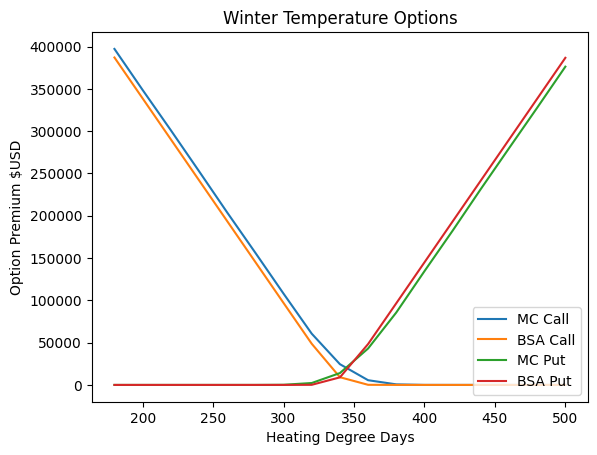

In [31]:
# Création d'un DataFrame avec les résultats des options pour chaque type (Call/Put) et méthode (MC/BSA)
df = pd.DataFrame({'MC Call': data[:, 0], 'BSA Call': data[:, 1], 'MC Put': data[:, 2], 'BSA Put': data[:, 3]})

# Définition des strikes comme index du DataFrame
df.index = strikes

# Tracé des courbes pour chaque colonne (MC Call, BSA Call, MC Put, BSA Put)
plt.plot(df)

# Titre du graphique
plt.title('Winter Temperature Options')

# Étiquettes des axes
plt.ylabel('Option Premium $USD')  # L'axe des ordonnées représente le prix de l'option en USD
plt.xlabel('Heating Degree Days')  # L'axe des abscisses représente les degrés-jours de chauffage

# Légende avec les noms des colonnes du DataFrame, placée en bas à droite
plt.legend(df.columns, loc=4)

# Affichage du graphique
plt.show()


### Résultats des graphiques

Nous observons des similitudes entre l'option call et l'option put. Cependant, l'option put semble être plus étroitement alignée par rapport aux degrés-jours de chauffage que l'option call.

Les deux modèles de prédiction restent cependant assez proche, et semblent fournir des prédiction réalistes.

### Conclusion globale du projet

Dans ce projet, nous avons cherché à évaluer la valeur des options basées sur la température, en utilisant à la fois une approche de simulation Monte Carlo et une méthode basée sur le calcul de l'intégrale de risque neutre. Nous avons observé l'impact des variations de température, mesurées par les degrés-jours de chauffage, sur le prix des options call et put.

En conclusion, ce projet a permis de modéliser de manière réaliste le prix des options basées sur la température et a mis en évidence l'importance de la modélisation du risque et de la volatilité dans l'évaluation de ces instruments financiers. Les approches Monte Carlo et risque neutre ont prouvé leur efficacité dans la prédiction des valeurs de ces options, offrant ainsi un outil précieux pour les acteurs du marché des dérivés climatiques.
